In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
185,15814816,Male,31,66000,0
255,15750056,Female,52,90000,1
143,15783029,Male,30,89000,0
367,15671249,Male,46,88000,1
233,15614187,Male,49,86000,1


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df=df.iloc[:,2:]

In [8]:
df.sample(5)

,Age,EstimatedSalary,Purchased
11,26,52000,0
34,27,90000,0
149,20,74000,0
214,47,43000,0
322,41,52000,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train, y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3, random_state=0)

In [11]:
X_train.shape

(280, 2)

In [12]:
X_test.shape

(120, 2)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [18]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [19]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [20]:
np.round(X_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [21]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


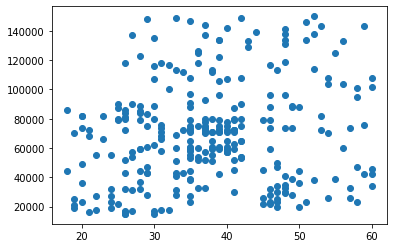

In [22]:
 plt.scatter(X_train['Age'],X_train['EstimatedSalary'])

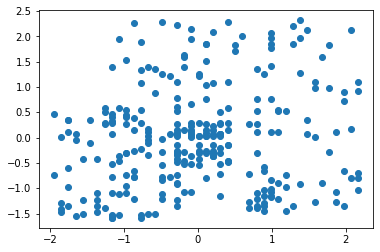

In [23]:
 plt.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

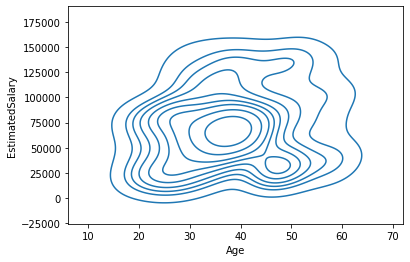

In [24]:
sns.kdeplot(X_train['Age'],X_train['EstimatedSalary'])

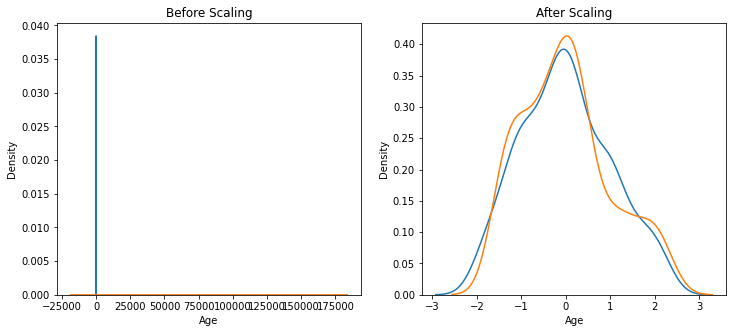

In [33]:
fig,(a1,a2)= plt.subplots(ncols=2, figsize=(12,5))
a1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=a1)
sns.kdeplot(X_train['EstimatedSalary'],ax=a1)
a2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax= a2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax= a2)
plt.show()

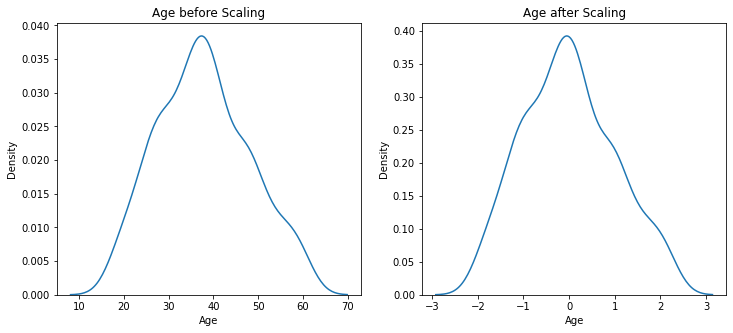

In [42]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Age before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
ax2.set_title("Age after Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

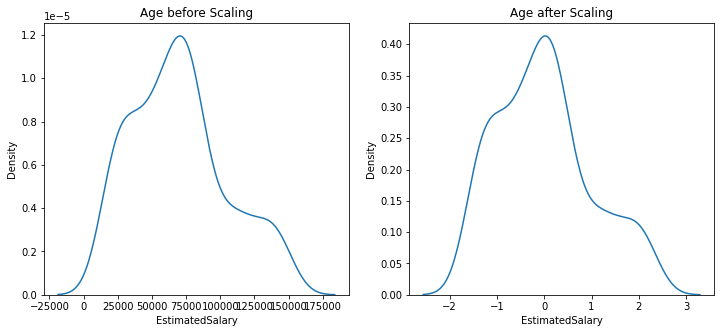

In [43]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Age before Scaling")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax2.set_title("Age after Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lgr=LogisticRegression()
lgr_scaled = LogisticRegression()

In [48]:
lgr.fit(X_train,y_train)
lgr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [50]:
y_pred=lgr.predict(X_test)
y_pred_scaled= lgr_scaled.predict(X_test_scaled)

In [51]:
from sklearn.metrics import accuracy_score 

In [52]:
print("Actual: {}".format(accuracy_score(y_test,y_pred)))

Actual: 0.6583333333333333


In [53]:
print("Scaled : {}".format(accuracy_score(y_test, y_pred_scaled)))

Scaled : 0.8666666666666667


In [54]:
from sklearn.linear_model import LinearRegression

In [56]:
lr=LinearRegression()
lr_scaled= LinearRegression()


In [58]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LinearRegression()

In [64]:
print("Actual : {}".format(accuracy_score(y_test, y_pred)))

Actual : 0.6583333333333333


In [65]:
print("Sclaed : {}".format(accuracy_score(y_test, y_pred_scaled)))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt= DecisionTreeClassifier()
